# Función de costo o coste
## Errores en regresiones
###### https://www.chreinvent.com/recursos/error-cuadr%C3%A1tico
Dos ejemplos: uno para regresión lineal MSE y otro para un modelo bayesiano

**1. Ejemplo completo que ilustra cómo calcular y visualizar una función de coste, en este caso, el Error Cuadrático Medio (MSE), en el contexto de una regresión lineal simple.**

El ejemplo incluye:

1. Generar datos sintéticos.
2. Ajustar un modelo de regresión lineal.
3. Calcular el MSE.
4. Visualizar gráficamente cómo varía el coste al ajustar los parámetros del modelo.

MSE del modelo ajustado: 4.91


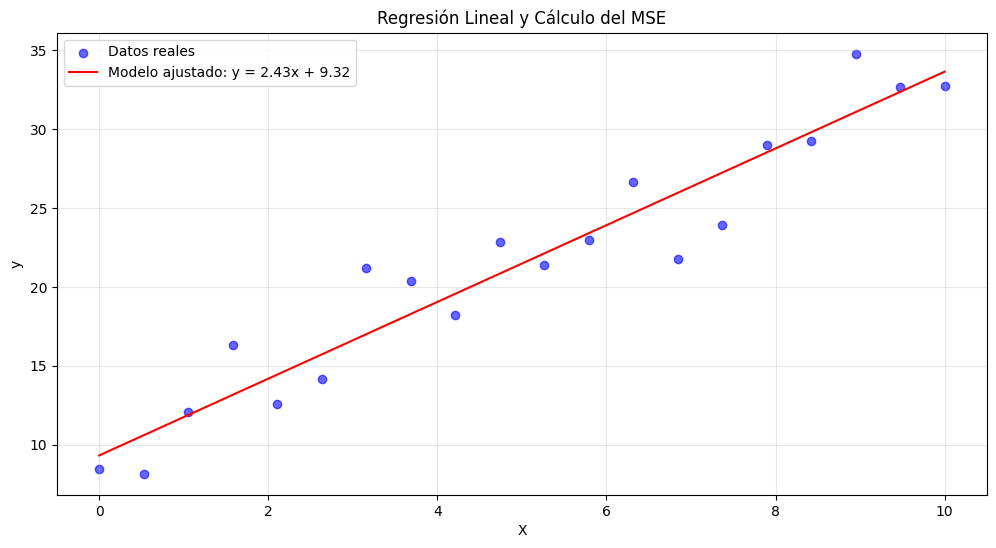

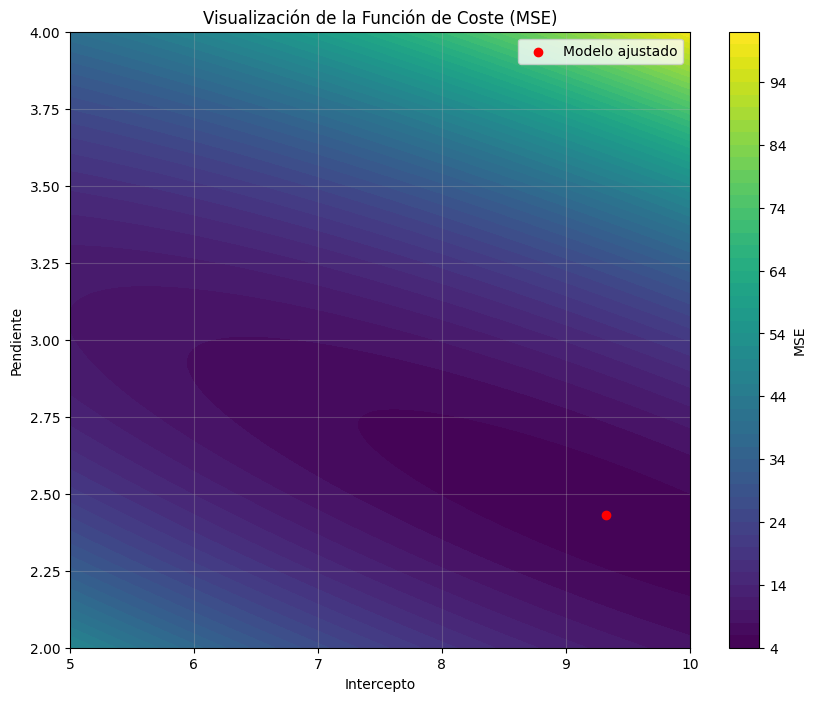

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generar datos sintéticos
np.random.seed(42)
X = np.linspace(0, 10, 20)  # Datos independientes
y = 3 * X + 7 + np.random.normal(0, 3, len(X))  # Datos dependientes con ruido

# Reshape X para ajustarse a scikit-learn
X = X.reshape(-1, 1)

# 2. Ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calcular el MSE del modelo ajustado
mse = mean_squared_error(y, y_pred)

print(f"MSE del modelo ajustado: {mse:.2f}")

# 3. Visualizar el modelo y los datos
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Datos reales", color="blue", alpha=0.6)
plt.plot(X, y_pred, label=f"Modelo ajustado: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}", color="red")
plt.title("Regresión Lineal y Cálculo del MSE")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 4. Visualizar la función de coste (MSE) para diferentes pendientes e interceptos
slopes = np.linspace(2, 4, 100)  # Posibles valores de la pendiente
intercepts = np.linspace(5, 10, 100)  # Posibles valores de la intersección

# Crear una cuadrícula de valores de coste
costs = np.zeros((len(slopes), len(intercepts)))

for i, slope in enumerate(slopes):
    for j, intercept in enumerate(intercepts):
        # Predecir valores con parámetros hipotéticos
        y_hypothetical = slope * X.flatten() + intercept
        costs[i, j] = mean_squared_error(y, y_hypothetical)

# Visualizar la función de coste
plt.figure(figsize=(10, 8))
plt.contourf(intercepts, slopes, costs, levels=50, cmap="viridis")
plt.colorbar(label="MSE")
plt.xlabel("Intercepto")
plt.ylabel("Pendiente")
plt.title("Visualización de la Función de Coste (MSE)")
plt.scatter(model.intercept_, model.coef_, color="red", label="Modelo ajustado")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Conceptos de visualización**
La visualización de la función de coste tiene como objetivo mostrar cómo varía el error (en este caso, el MSE) al cambiar los parámetros del modelo, específicamente la pendiente y el intercepto.

1. Mapa de contorno: Representa gráficamente el error (MSE) en función de 𝑚 (pendiente) y 𝑏 (intercepto).
2. Los colores y líneas indican niveles de error: Los colores más claros representan errores mayores (mal ajuste). Los colores más oscuros o el mínimo en la gráfica representan errores menores (mejor ajuste).

3. Desglose de la visualización: Eje X: Valores posibles para el intercepto (𝑏). Eje Y: Valores posibles para la pendiente (𝑚).
4. Colores y contornos: Cada punto en la gráfica corresponde a una combinación específica de 𝑚 y 𝑏. 
    + El color asociado al punto indica el valor del MSE: Tonos oscuros: menor MSE (mejor ajuste). Tonos claros: mayor MSE (peor ajuste).
5. Punto rojo: Este representa el modelo ajustado (la combinación de 𝑚 y 𝑏 que minimiza el MSE). 
    + El objetivo es llegar al punto donde el MSE es más bajo, que es el "valle" en el mapa de contorno.

**Interpretación**
La visualización permite entender cómo la selección de los parámetros 𝑚 y 𝑏 afecta el error del modelo.
+ Idealmente, queremos ajustar 𝑚 y 𝑏 para que el MSE sea lo más bajo posible, es decir, ubicarnos en la región más oscura del gráfico.


___________

**2. Ejemplo de ajuste de función de coste con un modelo bayesiano**

Un análisis bayesiano tiene un enfoque diferente al enfoque clásico de la minimización de funciones de coste. 
+ En el contexto bayesiano, no buscamos un único "mejor valor" para los parámetros 𝑚 y 𝑏, sino que calculamos una distribución posterior para cada parámetro, 
    + que refleja nuestra creencia actual sobre esos valores dados los datos observados y nuestras creencias previas.

En este ejemplo, construimos una regresión lineal desde un enfoque bayesiano utilizando la librería pymc. 
+ Calculamos las distribuciones posteriores para 𝑚 (pendiente) y 𝑏 (intercepto), 
+ y visualizamos la región de alta probabilidad (análoga a la región más oscura en la visualización clásica).

Los resultados pueden verse en las figuras correspondientes dentro de este apartado y el código se comparte en un jupyter notebook en github.

Desglose del código

+ Definición del modelo: Definimos prioris para la pendiente (m) y el intercepto (b) como distribuciones normales amplias 
    + (media=0, desviación estándar=10), indicando una creencia inicial sin mucha información.
+ Likelihood: El modelo relaciona los datos observados con las predicciones generadas por y = mx + by, 
    + asumiendo que el ruido sigue una distribución normal con desviación estándar σ.
+ Muestreo MCMC: Se utiliza un algoritmo de muestreo (NUTS) para generar muestras de las distribuciones posteriores de m y b.

Resumen de resultados: Calculamos estadísticas descriptivas de las distribuciones posteriores (media, desviación estándar, percentiles, etc.).

Visualización: Graficamos las distribuciones posteriores para m y b. 
+ Varias líneas ajustadas (muestreadas de la distribución posterior) para mostrar la incertidumbre del modelo. 

El modelo promedio como una línea roja (los valores medios de m y b).


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 108 seconds.


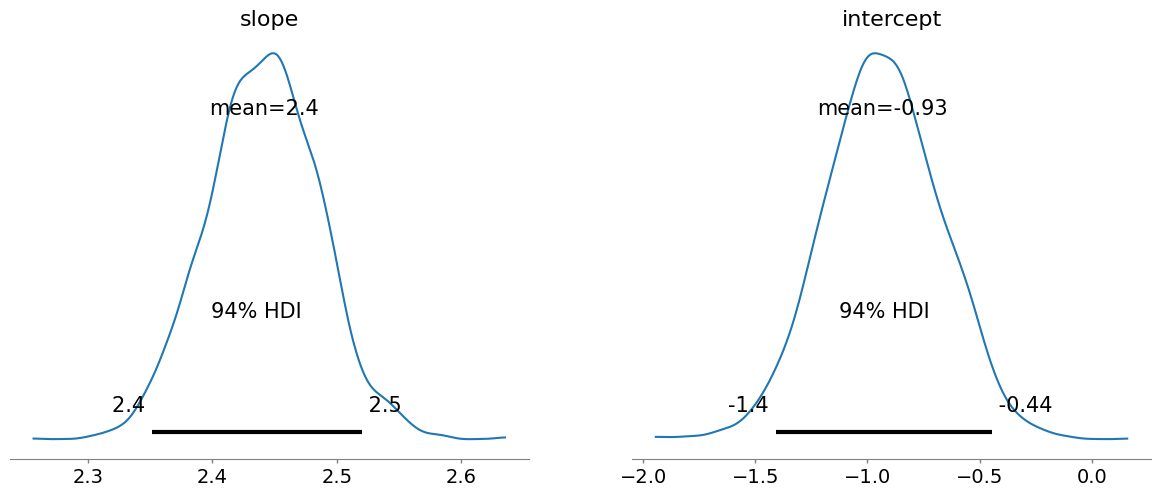

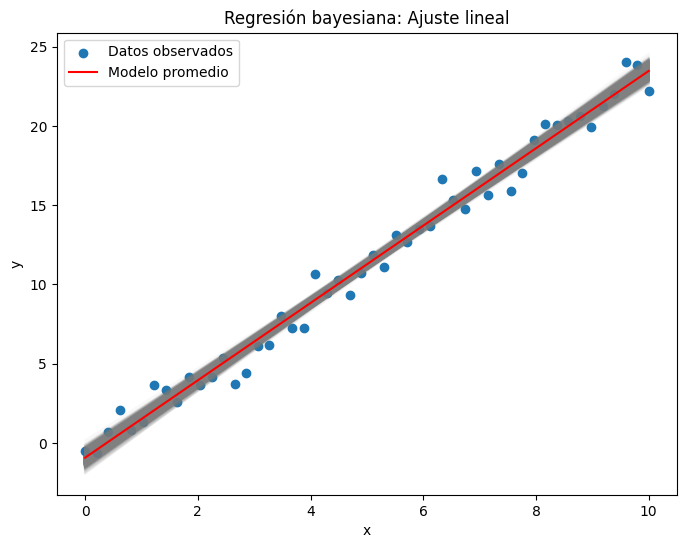

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Generar datos simulados
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_slope = 2.5
true_intercept = -1
y = true_slope * x + true_intercept + np.random.normal(0, 1, size=len(x))

# Modelo bayesiano
with pm.Model() as model:
    # Priors para los parámetros
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Modelo de regresión lineal
    y_pred = slope * x + intercept

    # Likelihood
    likelihood = pm.Normal("y", mu=y_pred, sigma=sigma, observed=y)

    # Inferencia
    trace = pm.sample(1000, return_inferencedata=True, tune=1000, target_accept=0.95)

# Resumen de los resultados
az.summary(trace, var_names=["slope", "intercept"])

# Graficar distribuciones posteriores
az.plot_posterior(trace, var_names=["slope", "intercept"])
plt.show()

# Visualización del ajuste y datos
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados")
x_pred = np.linspace(0, 10, 100)
for slope_sample, intercept_sample in zip(
    trace.posterior["slope"].values.flatten(),
    trace.posterior["intercept"].values.flatten(),
):
    plt.plot(x_pred, slope_sample * x_pred + intercept_sample, color="gray", alpha=0.05)

# Graficar el modelo promedio
mean_slope = trace.posterior["slope"].values.mean()
mean_intercept = trace.posterior["intercept"].values.mean()
plt.plot(x_pred, mean_slope * x_pred + mean_intercept, color="red", label="Modelo promedio")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión bayesiana: Ajuste lineal")
plt.show()


**Explicación gráfica**

Distribuciones posteriores:  Reflejan nuestra "creencia" actual sobre los parámetros dados los datos observados y nuestras prioris.
+ Ejemplo: Si la distribución de m está centrada en 2.4 con una desviación pequeña, significa que estamos bastante seguros de que la pendiente verdadera es cercana a 2.4.

Líneas grises: Representan posibles modelos ajustados basados en muestras de la posterior.
+ Esto ilustra la incertidumbre en el ajuste: no estamos 100% seguros del valor exacto de los parámetros, pero la mayoría de las líneas estarán cerca del modelo promedio.

Línea roja: Es el modelo promedio, que resume la mejor predicción según el enfoque bayesiano.

Nota: El HDI (Highest Density Interval) es un concepto clave en el análisis bayesiano, utilizado para describir las regiones más probables de una distribución posterior.  + Representa un intervalo donde se encuentra un porcentaje específico de probabilidad acumulada, con la característica de que dentro del intervalo, todos los valores tienen mayor densidad (probabilidad) que los valores fuera del intervalo.

**Interpretación de las graficas**

+ En lugar de obtener un único valor óptimo (m y b), obtenemos una distribución que captura tanto el valor más probable como la incertidumbre asociada.
+ Las distribuciones posteriores y las líneas muestreadas permiten visualizar la incertidumbre inherente en los parámetros y el ajuste.

____________